In [45]:
from PlantClassificationModels.EnsemblePredictor import EnsemblePredictor 

import numpy as np 
from keras.utils import to_categorical
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [6]:
npz_dataset_path = "PlantClassificationModels/NPZ DATASET/Augmented_CV_Dataset_22_Steps.npz"
loaded_arr = np.load(npz_dataset_path)
_X = loaded_arr["raw_X"]
_y = loaded_arr["raw_y"]

In [51]:
le = LabelEncoder()
ty = le.fit_transform(_y)
ty = to_categorical(ty)

with open("PlantClassificationModels/LabelEncoderData.pkl", "rb") as f:
    le = pickle.load(f)

In [27]:
raw_X = _X
raw_y = ty 
test_size = 0.2 
validation_size = 0.1
X_t, X_test, y_t, y_test = train_test_split(raw_X, raw_y, test_size=test_size)
del X_t, y_t


In [28]:
E = EnsemblePredictor()

c:\Users\Alaric\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


INFO: MODELS LOADED


In [64]:
_RES = E.MRV_VGG_Model.predict(X_test)
VGG_RES = np.argmax(_RES, axis=1)


745/745 [==============================] - 8s 10ms/step


In [66]:
E.MRV_VGG_Model.evaluate(X_test, y_test)

745/745 [==============================] - 12s 15ms/step - loss: 2.6834e-04 - accuracy: 0.9999


[0.00026833670563064516, 0.9999160170555115]

In [41]:
true_positives = np.argmax(y_test, axis=1)

In [52]:
le.classes_

array(['Artocarpus Heterophyllus (Jackfruit)',
       'Blumea Balsamifera (Sambong)', 'Citrus Limon (Lemon)',
       'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)',
       'Momordica Charantia (Ampalaya)', 'Moringa Oleifera (Malunggay)',
       'Psidium Guajava (Guava)', 'Vitex Negundo (Lagundi)',
       'Z-Background'], dtype='<U36')

In [55]:
true_positives[0], le.classes_[true_positives[0]]

(4, 'Mangifera Indica (Mango)')

In [57]:
VGG_RES[0], le.classes_[VGG_RES[0]]

(4, 'Mangifera Indica (Mango)')

In [62]:
_cm = confusion_matrix(true_positives, VGG_RES)

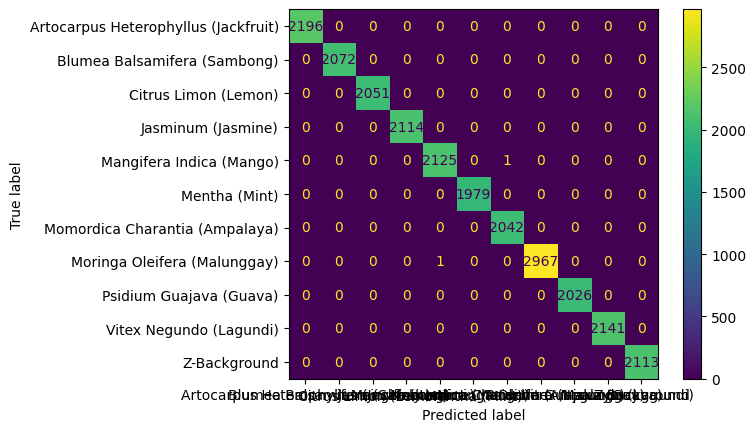

In [63]:
ConfusionMatrixDisplay(_cm, display_labels=le.classes_).plot()